In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dictionary = {'user':[], 'activity':[], 'time':[], 'x_acc':[],'y_acc':[],'z_acc':[] }

def parse_line( line):
    try:
        string = line.strip(';\n').split(',')
        if int( string[ 2 ]):
            dictionary['user'].append( int( string[ 0 ]))
            dictionary['activity'].append( string[ 1 ])
            dictionary['time'].append( int( string[ 2 ]))
            dictionary['x_acc'].append( float( string[ 3 ]))
            dictionary['y_acc'].append( float( string[ 4 ]))
            dictionary['z_acc'].append( float( string[ 5 ]))
    except:
        print( line)

with open ('./data/Accel_data/data', "r") as file:
    for line in file.readlines():
        for sline in line.split(';'):
            if sline.strip():
                parse_line( sline)
data = pd.DataFrame(data = dictionary)
data.sort_values(by = ['user', 'time'])
data['acc'] = data['x_acc']**2 +data['z_acc']**2 +data['y_acc']**2

data.head()

,user,activity,time,x_acc,y_acc,z_acc,acc
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,161.532686
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,152.910376
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,142.481520
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,351.636491
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,199.934049


In [3]:

print( data.size)
users = set(data.user)
activities = set(data.activity)
print(users)
print(activities)


7597541
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36}
{'Standing', 'Jogging', 'Downstairs', 'Walking', 'Upstairs', 'Sitting'}


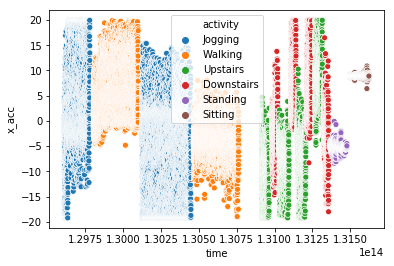

In [17]:
sns.scatterplot(x="time", y="x_acc", hue="activity",data=data[data.user == 19])
plt.show()